In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module


In [2]:
import numpy as np

# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(inputs)

[[0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]
 [0.24238435 0.84409997 0.5778091  0.67902128 0.50195289]
 [0.72952261 0.7481062  0.67977464 0.35655228 0.67105368]
 [0.77062024 0.11440374 0.04677993 0.64832428 0.27354905]
 [0.6188123  0.33180214 0.18728787 0.75623847 0.3288348 ]
 [0.78495809 0.91068235 0.7081201  0.95922543 0.0049115 ]
 [0.14511079 0.8966846  0.89632223 0.72627154 0.23627199]
 [0.94506907 0.28845905 0.97880576 0.96165559 0.59801594]
 [0.12572016 0.86272469 0.02854433 0.24660527 0.75120624]
 [0.75759436 0.35583141 0.0165229  0.4342072  0.11243304]
 [0.5367969  0.30878091 0.41187929 0.38822518 0.5225283 ]
 [0.95773967 0.23566857 0.09914585 0.15680593 0.07131737]
 [0.6293079  0.80348368 0.81140844 0.04561319 0.11062446]
 [0.02173531 0.42808424 0.83593944 0.48948866 0.51108173]
 [0.43934426 0.69892383 0.42682022 0.10947609 0.87788847]
 [0.25890557 0.79367771 0.6421139  0.19667346 0.59310318]
 [0.43216593 0.71561781 0.3418191  0.70499988 0.61496184]
 [0.78287982 0

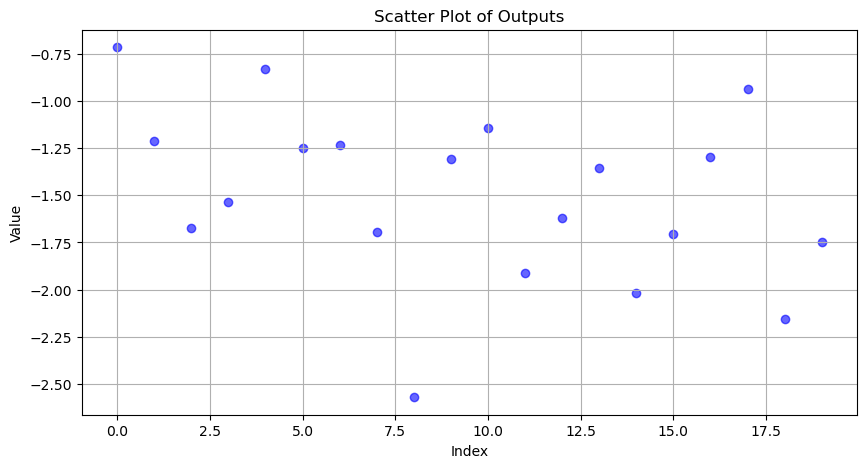

In [3]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot


In [4]:
#set up functions
import numpy as np

def generate_grid(n, resolution):
    num_points = int(1 / resolution) + 1
    grid = np.mgrid[[slice(0, 1, 1j*num_points) for _ in range(n)]]
    grid = grid.reshape(n, -1).T  # Reshape to have n columns
    return grid

def generate_binary_combinations(n):
    # Use itertools.product to generate combinations and convert to a NumPy array
    combinations = np.array(list(itertools.product([0, 1], repeat=n)))
    return combinations


In [6]:

# Number of dimensions
n = 5  
corners = generate_binary_combinations(n)

# Initial set of inputs using corners to force choice of points farther from the surface of the hypothesis space
initial_np = np.load('initial_inputs.npy')
initial_inputs = np.vstack([initial_np, corners])  # Append to the inputs
inputs = initial_inputs.copy()  # Start with the initial inputs

# Number of farthest points to find
num_far_points = 10

# Resolution for the grid
resolution = 0.05

# Generate initial grid
grid_points = generate_grid(n, resolution)

# List to store newly added farthest points
new_points = []

for _ in range(num_far_points):
    tree = KDTree(inputs)  # Create a KD-tree for the current inputs
    distances = tree.query(grid_points)[0]  # Find distances to nearest input points
    max_index = np.argmax(distances)  # Index of the farthest point
    farthest_point = grid_points[max_index]  # The farthest point

    # Find the nearest point in inputs to the farthest_point
    tree_initial = KDTree(inputs)
    nearest_dist, nearest_index = tree_initial.query(farthest_point)  # Get nearest
    nearest_point = inputs[nearest_index]

    # Calculate the midpoint
    new_point = (farthest_point + nearest_point) / 2

    # Append to the inputs and new_points
    inputs = np.vstack([inputs, new_point])
    new_points.append(new_point)
    formatted_point = ', '.join(f"{coord:.6f}" for coord in new_point)
    print(f"Added farthest point: [{formatted_point}]")


# Loop to find and append farthest points
#for _ in range(num_far_points):
 #   tree = KDTree(inputs)  # Create a KD-tree for the current inputs
  #  distances = tree.query(grid_points)[0]  # Find distances to nearest input points
   # max_index = np.argmax(distances)  # Index of the farthest point
    #farthest_point = grid_points[max_index]  # The farthest point
    
    #inputs = np.vstack([inputs, ????])  # Append to the inputs
    #new_points.append(???)  # Store new point separately
    #formatted_point = ', '.join(f"{coord:.6f}" for coord in farthest_point_rounded)
    #print(f"Added farthest point: [{formatted_point}]")



Added farthest point: [0.000000, 0.250000, 0.125000, 0.250000, 0.000000]
Added farthest point: [0.250000, 0.100000, 1.000000, 0.750000, 1.000000]
Added farthest point: [0.250000, 0.075000, 1.000000, 0.000000, 0.250000]
Added farthest point: [0.384406, 0.165901, 0.343644, 0.878119, 0.414417]
Added farthest point: [0.641440, 0.768168, 0.296642, 0.679850, 0.005163]
Added farthest point: [0.768398, 0.204390, 0.455940, 0.444113, 0.761264]
Added farthest point: [0.072555, 0.698342, 0.698161, 0.863136, 0.118136]
Added farthest point: [0.010868, 0.314042, 0.642970, 0.244744, 0.530541]
Added farthest point: [0.616083, 0.607809, 0.420910, 0.852500, 0.807481]
Added farthest point: [0.250000, 0.200000, 1.000000, 0.000000, 0.925000]


#### BEGIN SECOND PHASE - RUN FROM HERE

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from brokenaxes import brokenaxes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import torch
import math
from botorch.fit import fit_gpytorch_mll
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.acquisition import UpperConfidenceBound

In [3]:
# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(outputs)

[-0.71426495 -1.20995524 -1.67219994 -1.53605771 -0.82923655 -1.24704893
 -1.23378638 -1.69434344 -2.57116963 -1.30911635 -1.14478485 -1.91267714
 -1.62283895 -1.35668211 -2.0184254  -1.70255784 -1.29424696 -0.93575656
 -2.15576776 -1.74688209]


In [4]:
new_inputs = np.array([[0.384406, 0.165901, 0.343644, 0.878119, 0.414417],[0.64144,  0.768168, 0.296642, 0.67985,  0.005163],[0.768398, 0.20439,  0.45594,  0.444113,0.761264],[0.072555 ,0.698342, 0.698161, 0.863136 ,0.118136]])
new_outputs = np.array([-0.95813506330093,-1.20790243875159,-1.74412417525756,-0.800128372422867])


In [5]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)

[-0.71426495 -1.20995524 -1.67219994 -1.53605771 -0.82923655 -1.24704893
 -1.23378638 -1.69434344 -2.57116963 -1.30911635 -1.14478485 -1.91267714
 -1.62283895 -1.35668211 -2.0184254  -1.70255784 -1.29424696 -0.93575656
 -2.15576776 -1.74688209 -0.95813506 -1.20790244 -1.74412418 -0.80012837]


#### Visualise New Outputs

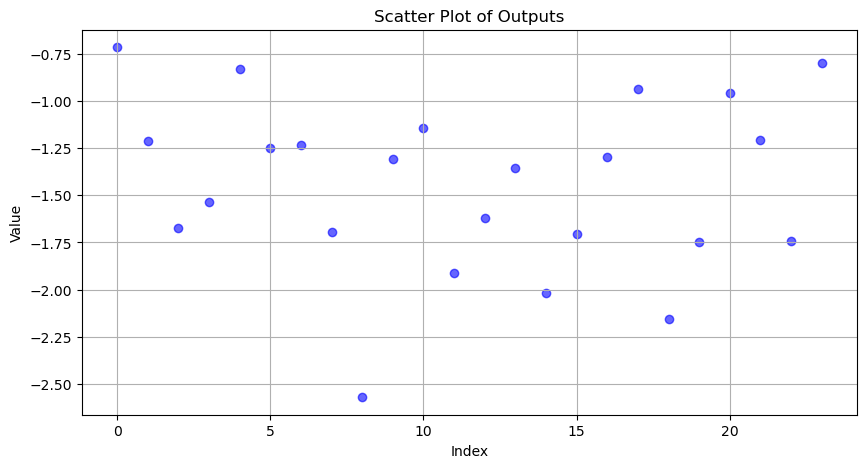

In [6]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [11]:
# Define the kernel
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gpr.fit(inputs, outputs)

# Define the objective function using the surrogate model
def surrogate_objective_function(x):
    # Predict using the Gaussian Process
    y_pred, sigma = gpr.predict(x.reshape(1, -1), return_std=True)
    # Return the negative prediction because Turbo minimizes the objective
    return -y_pred[0]

# Define the bounds of the search space, ENSURE THIS MATCHES NO OF DIMENSIONS
bounds = np.array([[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]])  # Adjust based on your actual input ranges

# Initialize Turbo1 optimizer
turbo1 = Turbo1(
    f=surrogate_objective_function,  # Use the surrogate objective function
    lb=bounds[:, 0],
    ub=bounds[:, 1],
    n_init=20,  # Initial number of random evaluations
    max_evals=200,  # Maximum number of evaluations
    batch_size=1,  # Number of evaluations per iteration
)

# Run the optimization
turbo1.optimize()

# Get the results
X, fX = turbo1.X, turbo1.fX

# Since we minimized the negative objective, the maximum value is the negative of the minimum found
best_solution = X[np.argmin(fX)]
max_value = -np.min(fX)
print(f"Best solution: {best_solution} with value {max_value}")

NameError: name 'Turbo1' is not defined

In [ ]:
#Define no. of dimensions
N = 5 
# Convert data to PyTorch tensors
pyt_inputs = torch.tensor(inputs, dtype=torch.float32)
pyt_outputs = torch.tensor(outputs, dtype=torch.float32).unsqueeze(-1)

gp = SingleTaskGP(pyt_inputs, pyt_outputs)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll);

In [1]:
# Convert data to PyTorch tensors
train_X = torch.tensor(inputs, dtype=torch.float32)
train_Y = torch.tensor(outputs, dtype=torch.float32).unsqueeze(-1)

# Define the Gaussian Process model
model = SingleTaskGP(train_X, train_Y, outcome_transform=Standardize(m=1))
mll = ExactMarginalLogLikelihood(model.likelihood, model)

# Fit the model
fit_gpytorch_model(mll)

# Define the UCB acquisition function
class TurboAcquisition(AcquisitionFunction):
    def __init__(self, model, beta=0.2):
        super().__init__(model)
        self.beta = beta

    def forward(self, X):
        posterior = self.model.posterior(X)
        mean = posterior.mean
        sigma = posterior.variance.sqrt()
        return mean + self.beta * sigma

acq_func = TurboAcquisition(model)

# Define the bounds of the search space
bounds = torch.tensor([[0.0, 0.0], [1.0, 1.0]], dtype=torch.float32)

# Perform the optimization
candidates, acq_value = optimize_acqf(
    acq_function=acq_func,
    bounds=bounds,
    q=1,
    num_restarts=10,
    raw_samples=100,
)

# Retrieve the best candidate
best_candidate = candidates.detach().numpy()

# Print the best candidate
print(f"Best candidate: {best_candidate}")

NameError: name 'torch' is not defined